In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from nltk.tokenize import RegexpTokenizer # tokenizer
from nltk.corpus import stopwords # remove stopwords
nltk.download('stopwords')
from nltk.util import ngrams
#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df = pd.read_csv('DS data 032321.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     959 non-null    object
 1   description                    959 non-null    object
 2   employmentType                 959 non-null    object
 3   experienceRequirements         959 non-null    object
 4   hiringOrganization             959 non-null    object
 5   identifier                     959 non-null    object
 6   industry                       958 non-null    object
 7   jobLocation                    959 non-null    object
 8   skills                         5 non-null      object
 9   title                          959 non-null    object
 10  validThrough                   959 non-null    object
 11  jobLocationType                128 non-null    object
 12  applicantLocationRequirements  128 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee..."
3,2021-03-22T20:24:23.000Z,Headspace is looking for a Data Scientist to h...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Headspace I...","{'@type': 'PropertyValue', 'name': 'Headspace ...","Marketing and Advertising,Computer Software,In...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist (Remote),2021-04-21T20:24:22.000Z,TELECOMMUTE,"{'@type': 'Country', 'name': 'United States'}",NaN,NaN,<em>Headspace is looking for a Data Scientist ...
4,2021-03-23T09:07:02.000Z,DescriptionThe AWS Applications team builds po...,FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Amazon Web ...","{'@type': 'PropertyValue', 'name': 'Amazon Web...","Computer Software,Information Technology and S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist,2021-04-22T09:07:01.000Z,NaN,NaN,"{'@type': 'MonetaryAmount', 'currency': 'USD',...",NaN,<strong><u>Description<br><br></u></strong>The...


In [4]:
df['description'][0]

'Genuent is hiring a Data Scientist/Data Engineer. This would be a long term contract opportunity located in Houston, TX. If this is something you might be interested in, please send your updated resume to Mike Sabo: MSabo@genuent.com\xa0**Due to client restrictions, we are only accepting those authorized to work in the US without visa sponsorship now or in the future**We are looking for a Data Scientist to build econometric models and apply economic theory to solve business problems to support our enterprise strategic initiatives. Reporting to the Director of Data Science, this person will be the SME in developing complete analytical solutions, mining extensive data sets for insights, building scalable models, and enabling the overall Data Science capability. This person will also\xa0drive the optimization of how we predict market demand pricing, and marketing mix to support both the business lines of service. This person will help build a brand new data science organization.Responsib

In [5]:
df['description'] = df.description.str.lower()

In [6]:
df['description'][0]

'genuent is hiring a data scientist/data engineer. this would be a long term contract opportunity located in houston, tx. if this is something you might be interested in, please send your updated resume to mike sabo: msabo@genuent.com\xa0**due to client restrictions, we are only accepting those authorized to work in the us without visa sponsorship now or in the future**we are looking for a data scientist to build econometric models and apply economic theory to solve business problems to support our enterprise strategic initiatives. reporting to the director of data science, this person will be the sme in developing complete analytical solutions, mining extensive data sets for insights, building scalable models, and enabling the overall data science capability. this person will also\xa0drive the optimization of how we predict market demand pricing, and marketing mix to support both the business lines of service. this person will help build a brand new data science organization.responsib

## Tokenizer

In [7]:
tokenizer = RegexpTokenizer(r'\w+')
#test
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

In [8]:
# word tokenize
df['description'] = df.description.apply(tokenizer.tokenize)
df.description

0      [genuent, is, hiring, a, data, scientist, data...
1      [ayata, is, developing, its, prescriptive, ana...
2      [our, team, part, of, the, customer, success, ...
3      [headspace, is, looking, for, a, data, scienti...
4      [descriptionthe, aws, applications, team, buil...
                             ...                        
954    [are, you, the, kind, of, person, that, is, no...
955    [the, aimlabs, consulting, team, is, looking, ...
956    [the, opportunitycome, work, for, a, data, dri...
957    [exponent, is, a, leading, engineering, and, s...
958    [if, you, are, a, data, scientist, with, exper...
Name: description, Length: 959, dtype: object

In [9]:
df['description'][0]

['genuent',
 'is',
 'hiring',
 'a',
 'data',
 'scientist',
 'data',
 'engineer',
 'this',
 'would',
 'be',
 'a',
 'long',
 'term',
 'contract',
 'opportunity',
 'located',
 'in',
 'houston',
 'tx',
 'if',
 'this',
 'is',
 'something',
 'you',
 'might',
 'be',
 'interested',
 'in',
 'please',
 'send',
 'your',
 'updated',
 'resume',
 'to',
 'mike',
 'sabo',
 'msabo',
 'genuent',
 'com',
 'due',
 'to',
 'client',
 'restrictions',
 'we',
 'are',
 'only',
 'accepting',
 'those',
 'authorized',
 'to',
 'work',
 'in',
 'the',
 'us',
 'without',
 'visa',
 'sponsorship',
 'now',
 'or',
 'in',
 'the',
 'future',
 'we',
 'are',
 'looking',
 'for',
 'a',
 'data',
 'scientist',
 'to',
 'build',
 'econometric',
 'models',
 'and',
 'apply',
 'economic',
 'theory',
 'to',
 'solve',
 'business',
 'problems',
 'to',
 'support',
 'our',
 'enterprise',
 'strategic',
 'initiatives',
 'reporting',
 'to',
 'the',
 'director',
 'of',
 'data',
 'science',
 'this',
 'person',
 'will',
 'be',
 'the',
 'sme',
 '

## Remove stopwords

In [10]:
all_stopwords = stopwords.words('english')
all_stopwords[:2]

['i', 'me']

In [11]:
df['description'] = df.description.apply(lambda text: [w for w in text if w not in all_stopwords])
df.description

0      [genuent, hiring, data, scientist, data, engin...
1      [ayata, developing, prescriptive, analytics, s...
2      [team, part, customer, success, engineering, o...
3      [headspace, looking, data, scientist, help, us...
4      [descriptionthe, aws, applications, team, buil...
                             ...                        
954    [kind, person, afraid, ask, conducts, independ...
955    [aimlabs, consulting, team, looking, high, ene...
956    [opportunitycome, work, data, driven, innovato...
957    [exponent, leading, engineering, scientific, c...
958    [data, scientist, experience, please, read, to...
Name: description, Length: 959, dtype: object

In [12]:
df['description'][0]

['genuent',
 'hiring',
 'data',
 'scientist',
 'data',
 'engineer',
 'would',
 'long',
 'term',
 'contract',
 'opportunity',
 'located',
 'houston',
 'tx',
 'something',
 'might',
 'interested',
 'please',
 'send',
 'updated',
 'resume',
 'mike',
 'sabo',
 'msabo',
 'genuent',
 'com',
 'due',
 'client',
 'restrictions',
 'accepting',
 'authorized',
 'work',
 'us',
 'without',
 'visa',
 'sponsorship',
 'future',
 'looking',
 'data',
 'scientist',
 'build',
 'econometric',
 'models',
 'apply',
 'economic',
 'theory',
 'solve',
 'business',
 'problems',
 'support',
 'enterprise',
 'strategic',
 'initiatives',
 'reporting',
 'director',
 'data',
 'science',
 'person',
 'sme',
 'developing',
 'complete',
 'analytical',
 'solutions',
 'mining',
 'extensive',
 'data',
 'sets',
 'insights',
 'building',
 'scalable',
 'models',
 'enabling',
 'overall',
 'data',
 'science',
 'capability',
 'person',
 'also',
 'drive',
 'optimization',
 'predict',
 'market',
 'demand',
 'pricing',
 'marketing',
 

In [13]:
# Stemming
porter = nltk.PorterStemmer()
print(df.description[0][:20])
print([porter.stem(t) for t in df.description[0][:20]])
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in df.description[0][:20]])

['genuent', 'hiring', 'data', 'scientist', 'data', 'engineer', 'would', 'long', 'term', 'contract', 'opportunity', 'located', 'houston', 'tx', 'something', 'might', 'interested', 'please', 'send', 'updated']
['genuent', 'hire', 'data', 'scientist', 'data', 'engin', 'would', 'long', 'term', 'contract', 'opportun', 'locat', 'houston', 'tx', 'someth', 'might', 'interest', 'pleas', 'send', 'updat']
['genuent', 'hiring', 'data', 'scientist', 'data', 'engineer', 'would', 'long', 'term', 'contract', 'opportunity', 'located', 'houston', 'tx', 'something', 'might', 'interested', 'please', 'send', 'updated']


In [14]:
df['description'] = df.description.apply(lambda text: [wnl.lemmatize(t) for t in text])
df.description[0][:10]

['genuent',
 'hiring',
 'data',
 'scientist',
 'data',
 'engineer',
 'would',
 'long',
 'term',
 'contract']

In [15]:
df['description'][0]

['genuent',
 'hiring',
 'data',
 'scientist',
 'data',
 'engineer',
 'would',
 'long',
 'term',
 'contract',
 'opportunity',
 'located',
 'houston',
 'tx',
 'something',
 'might',
 'interested',
 'please',
 'send',
 'updated',
 'resume',
 'mike',
 'sabo',
 'msabo',
 'genuent',
 'com',
 'due',
 'client',
 'restriction',
 'accepting',
 'authorized',
 'work',
 'u',
 'without',
 'visa',
 'sponsorship',
 'future',
 'looking',
 'data',
 'scientist',
 'build',
 'econometric',
 'model',
 'apply',
 'economic',
 'theory',
 'solve',
 'business',
 'problem',
 'support',
 'enterprise',
 'strategic',
 'initiative',
 'reporting',
 'director',
 'data',
 'science',
 'person',
 'sme',
 'developing',
 'complete',
 'analytical',
 'solution',
 'mining',
 'extensive',
 'data',
 'set',
 'insight',
 'building',
 'scalable',
 'model',
 'enabling',
 'overall',
 'data',
 'science',
 'capability',
 'person',
 'also',
 'drive',
 'optimization',
 'predict',
 'market',
 'demand',
 'pricing',
 'marketing',
 'mix',
 '

# N-grams

In [16]:

from collections import Counter


In [17]:
print(len(df.description[0]))
len(df.description.sum())

371


345179

In [18]:
#Create your bigrams
#ugs = nltk.unigrams(df.job_description.sum())

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(df.description.sum())
fdist

FreqDist({'data': 10183, 'experience': 4393, 'team': 3217, 'business': 2978, 'work': 2599, 'science': 2491, 'learning': 2448, 'model': 2106, 'machine': 1936, 'product': 1834, ...})

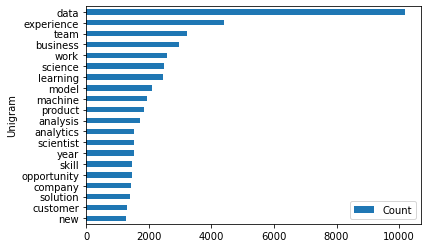

In [19]:
df_uni = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_uni = pd.DataFrame(df_uni,columns=['Unigram','Count'])
df_uni[:20][::-1].plot.barh(x='Unigram',y='Count')
plt.show()

In [20]:
#Create your bigrams
bgs = nltk.bigrams(df.description.sum())

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)

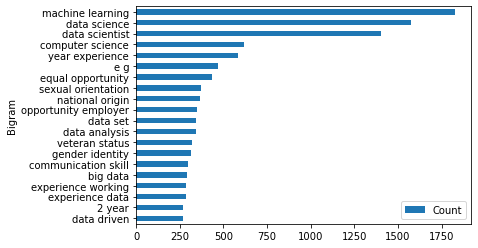

In [21]:
df_bg = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_bg = pd.DataFrame(df_bg,columns=['Bigram','Count'])
df_bg['Bigram'] = [" ".join(s) for s in df_bg['Bigram']]
df_bg[:20][::-1].plot.barh(x='Bigram',y='Count')
plt.show()

In [22]:
# trigram
tgs=ngrams(df.description.sum(),3)
fdist = nltk.FreqDist(tgs)
sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]

[(('equal', 'opportunity', 'employer'), 323),
 (('sexual', 'orientation', 'gender'), 209),
 (('machine', 'learning', 'model'), 207),
 (('race', 'color', 'religion'), 191),
 (('orientation', 'gender', 'identity'), 184),
 (('without', 'regard', 'race'), 166),
 (('data', 'science', 'team'), 165),
 (('machine', 'learning', 'technique'), 139),
 (('regard', 'race', 'color'), 139),
 (('employment', 'without', 'regard'), 136),
 (('2', 'year', 'experience'), 135),
 (('data', 'scientist', 'join'), 133),
 (('machine', 'learning', 'algorithm'), 131),
 (('large', 'data', 'set'), 128),
 (('equal', 'employment', 'opportunity'), 122),
 (('natural', 'language', 'processing'), 117),
 (('protected', 'veteran', 'status'), 115),
 (('degree', 'computer', 'science'), 113),
 (('gender', 'identity', 'expression'), 110),
 (('receive', 'consideration', 'employment'), 109),
 (('consideration', 'employment', 'without'), 109),
 (('looking', 'data', 'scientist'), 105),
 (('3', 'year', 'experience'), 104),
 (('applic

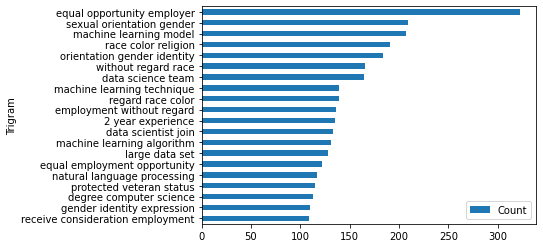

In [23]:
df_tg = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_tg = pd.DataFrame(df_tg,columns=['Trigram','Count'])
df_tg['Trigram'] = [" ".join(s) for s in df_tg['Trigram']]
df_tg[:20][::-1].plot.barh(x='Trigram',y='Count')
plt.show()

In [24]:
# quatergram
qgs=ngrams(df.description.sum(),4)
fdist = nltk.FreqDist(qgs)
sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]

[(('sexual', 'orientation', 'gender', 'identity'), 184),
 (('without', 'regard', 'race', 'color'), 139),
 (('regard', 'race', 'color', 'religion'), 126),
 (('receive', 'consideration', 'employment', 'without'), 109),
 (('consideration', 'employment', 'without', 'regard'), 109),
 (('employment', 'without', 'regard', 'race'), 108),
 (('applicant', 'receive', 'consideration', 'employment'), 99),
 (('qualified', 'applicant', 'receive', 'consideration'), 97),
 (('race', 'color', 'religion', 'sex'), 96),
 (('sex', 'sexual', 'orientation', 'gender'), 84),
 (('federal', 'state', 'local', 'law'), 70),
 (('employer', 'qualified', 'applicant', 'receive'), 63),
 (('data', 'science', 'machine', 'learning'), 63),
 (('orientation', 'gender', 'identity', 'expression'), 59),
 (('religion', 'color', 'national', 'origin'), 59),
 (('race', 'religion', 'color', 'national'), 57),
 (('opportunity', 'affirmative', 'action', 'employer'), 56),
 (('opportunity', 'employer', 'qualified', 'applicant'), 55),
 (('ge

## Visualization

(-0.5, 399.5, 199.5, -0.5)

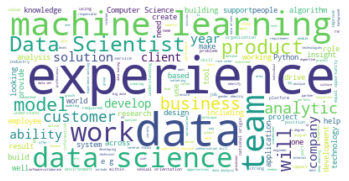

In [30]:
wordcloud = WordCloud(background_color="white").generate(' '.join(df.description))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [31]:
df.employmentType.value_counts()

FULL_TIME     912
CONTRACTOR     37
PART_TIME       5
INTERN          4
TEMPORARY       1
Name: employmentType, dtype: int64

In [32]:
df.description[df.employmentType=='FULL_TIME']

0      Genuent is hiring a Data Scientist/Data Engine...
1      Ayata is developing its Prescriptive Analytics...
2      Our team, part of the Customer Success Enginee...
3      Headspace is looking for a Data Scientist to h...
4      DescriptionThe AWS Applications team builds po...
                             ...                        
954    Are you the kind of person that is not afraid ...
955    The AimLabs Consulting Team is looking for a h...
956    The OpportunityCome work for a data-driven inn...
957    Exponent  is a leading engineering and scienti...
958    If you are a Data Scientist with experience, p...
Name: description, Length: 912, dtype: object

(-0.5, 399.5, 199.5, -0.5)

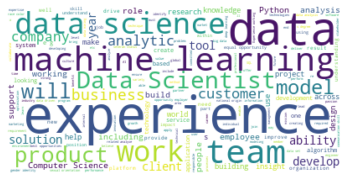

In [33]:
ft_des = df.description[df.employmentType=='FULL_TIME']
wordcloud = WordCloud(background_color="white").generate(' '.join(ft_des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

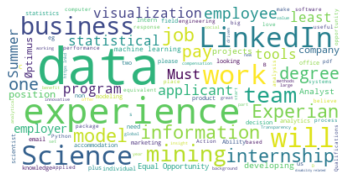

In [34]:
in_des = df.description[df.employmentType=='INTERN']
wordcloud = WordCloud(background_color="white").generate(' '.join(in_des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

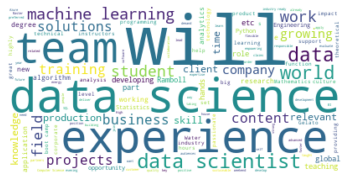

In [35]:
in_des = df.description[df.employmentType=='PART_TIME']
wordcloud = WordCloud(background_color="white").generate(' '.join(in_des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [36]:
df.experienceRequirements.value_counts()

Entry level         465
Mid-Senior level    222
Not Applicable      154
Associate           108
Internship            6
Director              4
Name: experienceRequirements, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

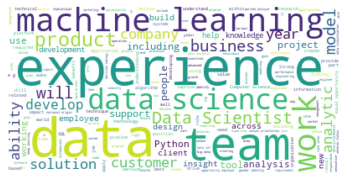

In [37]:
des = df.description[df.experienceRequirements=='Entry level']
wordcloud = WordCloud(background_color="white").generate(' '.join(des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

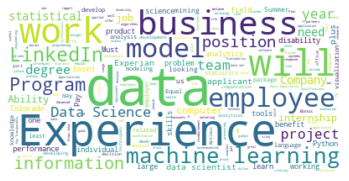

In [38]:
des = df.description[df.experienceRequirements=='Internship']
wordcloud = WordCloud(background_color="white").generate(' '.join(des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

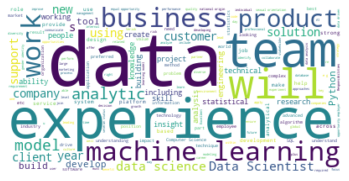

In [39]:
des = df.description[df.experienceRequirements=='Associate']
wordcloud = WordCloud(background_color="white").generate(' '.join(des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

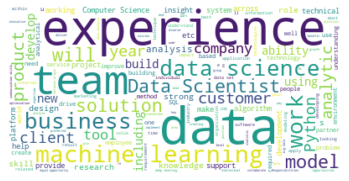

In [40]:
des = df.description[df.experienceRequirements=='Mid-Senior level']
wordcloud = WordCloud(background_color="white").generate(' '.join(des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

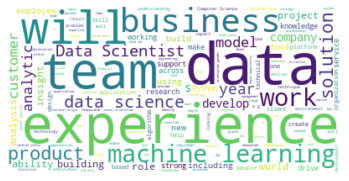

In [41]:
des = df.description[df.experienceRequirements=='Not Applicable']
wordcloud = WordCloud(background_color="white").generate(' '.join(des))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")